# Movie Clustering

**NOTE**: This examples is out of course and I am putting it here just for extra reading and also this notebook was not discussed in the live session.

### building the kMeans algorithm from scratch and not using inbuilt model in sklearn library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# load the data
data = pd.read_csv('movie_metadata1.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [3]:
f1 = data['director_facebook_likes'].values
f2 = data['actor_3_facebook_likes'].values

In [4]:
print(f1)
print(f2)

[  0 563   0 ...   0   0  16]
[ 855 1000  161 ...    0  489   16]


In [5]:
X = np.array(list(zip(f1,f2)))
X

array([[   0,  855],
       [ 563, 1000],
       [   0,  161],
       ...,
       [   0,    0],
       [   0,  489],
       [  16,   16]])

Text(0, 0.5, 'Actor 3 facebook likes')

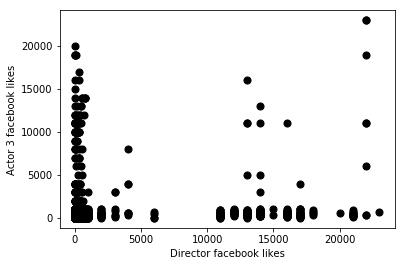

In [6]:
plt.scatter(f1, f2, c='black', s=50)
plt.xlabel('Director facebook likes')
plt.ylabel('Actor 3 facebook likes')

In [7]:
np.max(X)

23000

In [8]:
# Euclidean distance calculator
def dist(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

k = 5
# KMeans
# step1 : randomly choosing centroids

C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C  # random centroid co-ordinates

array([[21322.,  7306.],
       [20186.,  4077.],
       [ 9342.,   137.],
       [18172., 16567.],
       [21980., 18685.]], dtype=float32)

Text(0, 0.5, 'Actor 3 facebook likes')

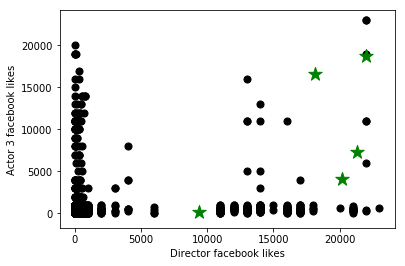

In [9]:
plt.scatter(f1, f2, c='black', s=50)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.xlabel('Director facebook likes')
plt.ylabel('Actor 3 facebook likes')

######
49561.37887508781
<class 'numpy.float64'>
[ 2137.7004  4408.7334  8944.593  12235.713   2981.7332]
[2878.2712  3062.1487   289.02057 6058.6416     0.     ]
[2913.2317      0.         28.234844 1190.9127      0.      ]
[  0.          0.          2.3362365 120.624756    0.       ]
[0. 0. 0. 0. 0.]


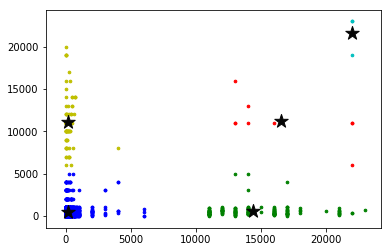

In [10]:
# to store the values of centroids when it updates
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))

# error is the distance between new and old centroid
error = dist(C, C_old, None)
print("######")
print(error)
print(type(error))

while error.any() != 0:
    # assigning each value/point to closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    # storing the old centroid value
    C_old = deepcopy(C)
    # find new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old)
    print(error)

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')